In [3]:
#Impoting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import Sequential

In [2]:
#Loading data

DATADIR = r"C:\Users\Talha Bin Salman\flowers"

CATEGORIES = ["daisy","dandelion","rose","sunflower","tulip"]

data=[]

for category in CATEGORIES:  
    
    path = os.path.join(DATADIR,category) 
    
    class_num=CATEGORIES.index(category)
    
    for img in os.listdir(path):  
        
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        
        img_array=np.array(img_array, dtype=np.float32)
                
        img_data=cv2.resize(img_array,(100,100))
        
        data.append([img_data, class_num])
        

<function matplotlib.pyplot.show(close=None, block=None)>

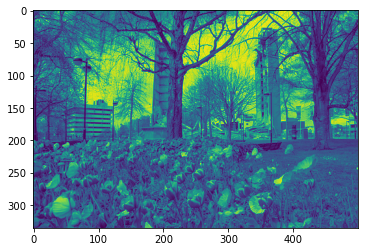

In [5]:
#Plotting image

plt.imshow(img_array)
plt.shows

In [33]:
#Shuffeling data

from sklearn.utils import shuffle

data=shuffle(data)

In [34]:
#Seperating features ans labels

x=[]
y=[]

for features,label in data:
    x.append(features)
    y.append(label)

In [35]:
#one hot encoding our labels

def one_hot_encode(sequence,dimensions=5):
    result=np.zeros((len(sequence),dimensions))
    for i,j in enumerate(sequence):
        result[i,j]=1.
        
    return result

#labels=one_hot_encode(labels)
y=one_hot_encode(y)

In [36]:
#Converting into numpy array

y=np.array(y)
x=np.array(x)

y=y.astype(int)
x=x.astype(int)

In [37]:
#Spliting into train, test and validation with 50%, 30% and 20% data respectively

train_images=x[0:2163]
train_labels=y[0:2163]

test_images=x[2163:3461]
test_labels=y[2163:3461]

validation_images=x[3461:]
validation_labels=y[3461:]

In [46]:
#print(len(test_images))

In [47]:
#Converting 3d to 2d array and normalize them

train_images = train_images.reshape((2163, 100*100))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((1298, 100 * 100))
test_images = test_images.astype('float32') / 255

validation_images = validation_images.reshape((865, 100 * 100))
validation_images = validation_images.astype('float32') / 255

In [40]:
#Building model

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(100*100,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(5,activation='softmax'))

In [41]:
#Compiling model

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
#Fitting data into model

model.fit(train_images,train_labels,epochs=20,batch_size=150,validation_data=(validation_images,validation_labels))

Epoch 1/20
15/15 [==============================] - 1s 20ms/step - loss: 734.0647 - accuracy: 0.1961 - val_loss: 1.7033 - val_accuracy: 0.2509
Epoch 2/20
15/15 [==============================] - 0s 9ms/step - loss: 1.6623 - accuracy: 0.2486 - val_loss: 1.6763 - val_accuracy: 0.2497
Epoch 3/20
15/15 [==============================] - 0s 9ms/step - loss: 1.6306 - accuracy: 0.2408 - val_loss: 1.6603 - val_accuracy: 0.2509
Epoch 4/20
15/15 [==============================] - 0s 10ms/step - loss: 1.6071 - accuracy: 0.2408 - val_loss: 1.6465 - val_accuracy: 0.2520
Epoch 5/20
15/15 [==============================] - 0s 10ms/step - loss: 1.6018 - accuracy: 0.2581 - val_loss: 1.6402 - val_accuracy: 0.2520
Epoch 6/20
15/15 [==============================] - 0s 9ms/step - loss: 1.6022 - accuracy: 0.2442 - val_loss: 1.6388 - val_accuracy: 0.2520
Epoch 7/20
15/15 [==============================] - 0s 10ms/step - loss: 1.6013 - accuracy: 0.2423 - val_loss: 1.6375 - val_accuracy: 0.2520
Epoch 8/20
15/

In [43]:
#Evaluating our model

model.evaluate(test_images,test_labels)

41/41 [==============================] - 0s 2ms/step - loss: 1.6041 - accuracy: 0.2365


[1.6041220426559448, 0.23651771247386932]

In [44]:
#Predicting values

model.predict(test_images)

array([[0.17618261, 0.2430922 , 0.18062043, 0.16862547, 0.23147924],
       [0.17618261, 0.2430922 , 0.18062043, 0.16862547, 0.23147924],
       [0.17618261, 0.2430922 , 0.18062043, 0.16862547, 0.23147924],
       ...,
       [0.17618261, 0.2430922 , 0.18062043, 0.16862547, 0.23147924],
       [0.17618261, 0.2430922 , 0.18062043, 0.16862547, 0.23147924],
       [0.17618261, 0.2430922 , 0.18062043, 0.16862547, 0.23147924]],
      dtype=float32)